<a href="https://colab.research.google.com/github/hanagueddari/Prediction_employes/blob/main/Pr%C3%A9diction_employ%C3%A9s_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse et Science des Données


Nous commençons par importer les bibliothèques nécessaires pour notre projet. Les principales bibliothèques utilisées ici sont pandas pour la manipulation des données et matplotlib.pyplot pour la visualisation.


Ensuite, nous chargeons les données à partir des fichiers CSV.
Les ensembles de données comprennent les données générales des employés, les données de l'enquête auprès des gestionnaires, les données de l'enquête auprès des employés, ainsi que les enregistrements d'entrée et de sortie.

In [ ]:
#Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

#chargement des données
general_data = pd.read_csv('general_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
in_time_data = pd.read_csv('in_time.csv')
out_time_data = pd.read_csv('out_time.csv')


La fonction pd.set_option est utilisée pour ajuster le nombre maximal de colonnes affichées.

In [ ]:
pd.set_option('display.max_columns', None)

# Analyse Exploratoire des Données (EDA)

L'Analyse Exploratoire des Données (EDA) est une étape cruciale pour comprendre la nature de nos données avant de passer à des analyses plus avancées. Nous allons explorer les distributions, les corrélations et les tendances dans les données pour obtenir des insights sur les caractéristiques des employés.





In [ ]:
# Afficher les premières lignes de l'ensemble de données 'general_data'
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


## Résumé statistique des colonnes numériques

Affichons un résumé statistique des colonnes numériques de l'ensemble de données 'general_data'. Cela nous donnera des informations importantes telles que la moyenne, l'écart-type, les quartiles, etc.


In [ ]:
# génèrer un résumé statistique des colonnes numériques du DataFrame.
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


## Répartition de l'attrition : Diagramme circulaire

Dans cette cellule, nous générons un diagramme circulaire pour représenter la répartition de l'attrition dans le DataFrame 'general_data'. Le diagramme circulaire permet une visualisation rapide de la proportion d'employés ayant attritionné par rapport à ceux qui n'ont pas attritionné.



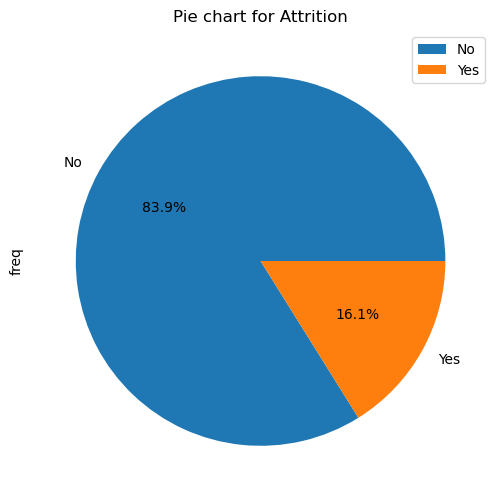

In [ ]:
# Générer un tableau croisé dynamique (crosstab) pour la répartition de l'attrition
pie_charts = pd.crosstab(general_data.Attrition, "freq")

# Créer un diagramme circulaire
pie_charts.plot.pie(subplots=True, figsize=(6, 6), autopct='%1.1f%%', legend=True)
plt.title('Pie chart for Attrition')
plt.show()

## Relation entre l'attrition et le genre : Diagramme à barres

Dans cette cellule, un diagramme à barres est généré pour illustrer la relation entre l'attrition et le genre dans le DataFrame 'general_data'. Cela nous permet de visualiser la proportion d'employés ayant attritionné par rapport à ceux qui n'ont pas attritionné, en fonction du genre.



Text(0, 0.5, 'Proportion')

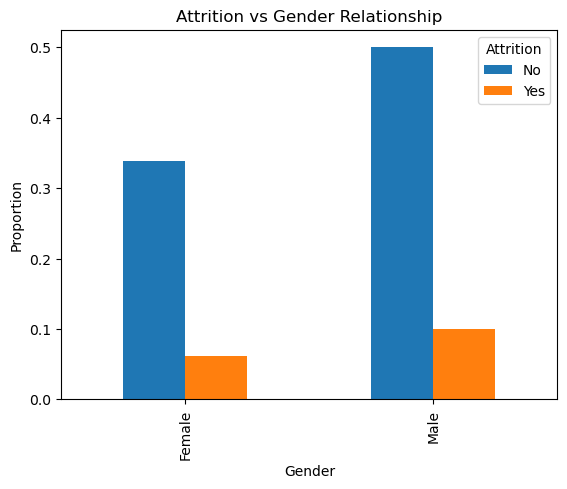

In [ ]:
# Générer un tableau croisé dynamique (crosstab) pour la relation entre l'attrition et le genre
gender_attrition=pd.crosstab(general_data.Gender, general_data.Attrition, normalize='all')

# Créer un diagramme à barres
gender_attrition.plot(kind='bar', legend=True)
plt.title('Attrition vs Gender Relationship')
plt.xlabel('Gender')
plt.ylabel('Proportion')

Dans cette cellule, un diagramme circulaire est généré pour illustrer la répartition de l'attrition en fonction du genre dans le DataFrame 'general_data'.



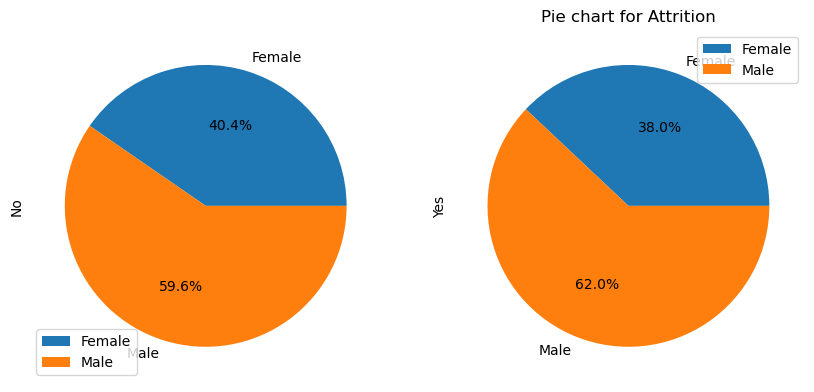

In [ ]:
gender_attrition=pd.crosstab(general_data.Gender, general_data.Attrition, normalize='all')
gender_attrition.plot.pie(subplots=True, figsize=(10, 10), autopct='%1.1f%%', legend=True)
plt.title('Pie chart for Attrition')
plt.show()

## Distribution de l'âge : Histogramme avec KDE

Dans cette cellule, un histogramme avec une estimation de la densité (KDE) est généré pour visualiser la distribution de l'âge dans le DataFrame 'general_data' à l'aide de la bibliothèque Seaborn.



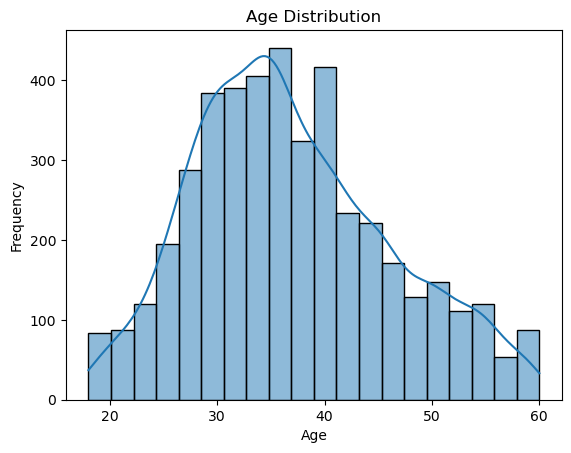

In [ ]:
# Importer la bibliothèque Seaborn
import seaborn as sns

# Générer un histogramme avec une estimation de la densité (KDE) pour l'âge
sns.histplot(general_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## EDA: Distribution de l'âge en fonction de l'attrition

Dans cette cellule, nous utilisons la bibliothèque Seaborn pour générer un histogramme avec une estimation de la densité (KDE) pour explorer la distribution de l'âge en fonction de l'attrition dans le DataFrame 'general_data'.



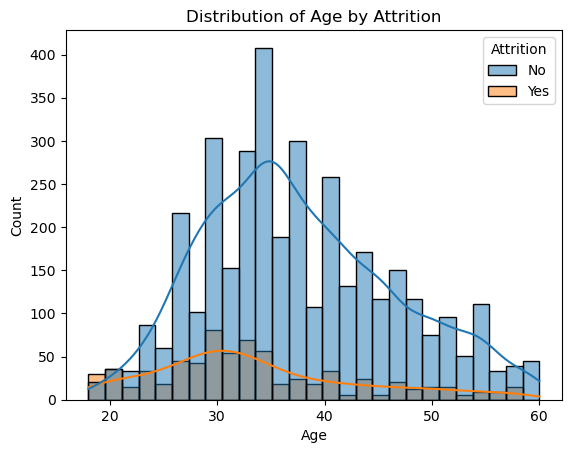

In [ ]:
# Générer un histogramme avec une estimation de la densité (KDE) pour l'âge en fonction de l'attrition
sns.histplot(data=general_data, x='Age', hue='Attrition', kde=True)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Boîtes à moustaches : Distribution des variables numériques

Dans cette cellule, nous utilisons un diagramme de boîtes à moustaches pour visualiser la distribution des variables numériques dans le DataFrame 'general_data'.






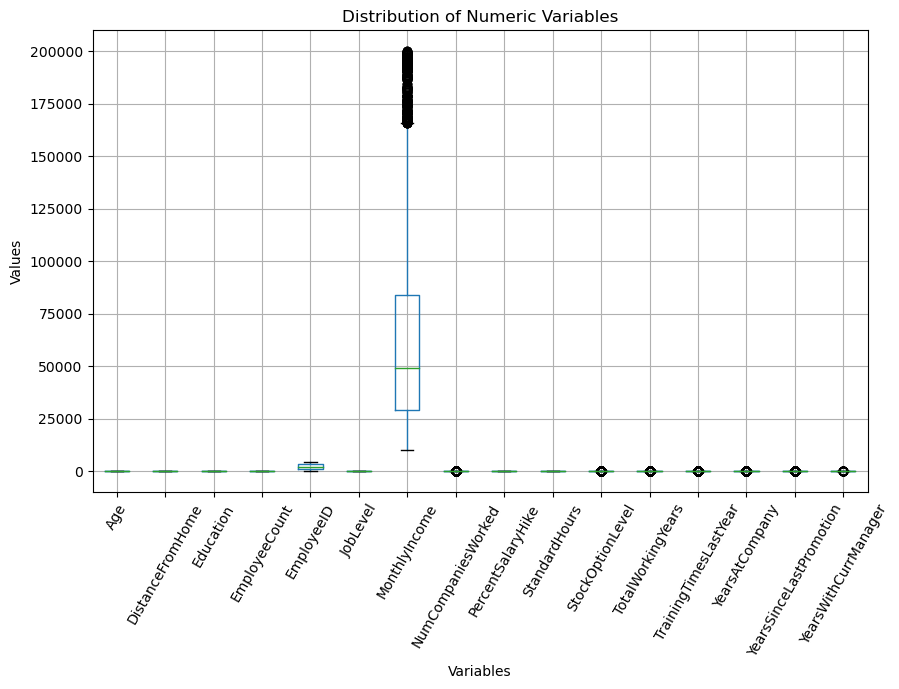

In [ ]:
# Générer des boîtes à moustaches pour la distribution des variables numériques
general_data.boxplot(rot=60, figsize=(10, 6))
plt.title('Distribution of Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

**Boîte à moustaches : Distribution de 'MonthlyIncome':**
Dans cette cellule, nous utilisons un diagramme de boîte à moustaches pour visualiser la distribution de la variable 'MonthlyIncome' dans le DataFrame 'general_data'.



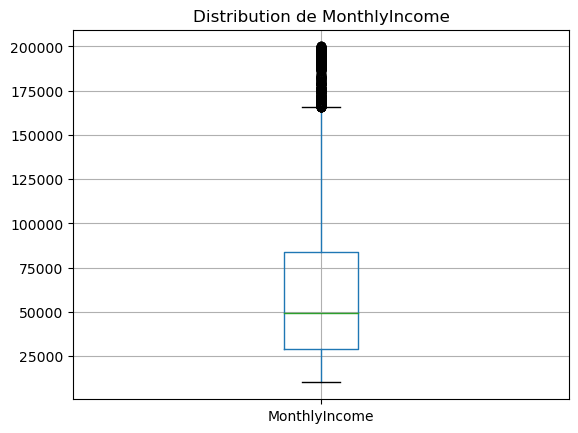

In [ ]:
# Générer une boîte à moustaches pour la variable 'MonthlyIncome'
general_data.boxplot('MonthlyIncome', grid=True)
plt.title('Distribution de MonthlyIncome')
plt.show()

## Boîte à moustaches : Revenu mensuel en fonction de l'attrition

Dans cette cellule, nous utilisons Seaborn pour générer un diagramme de boîte à moustaches représentant la distribution du revenu mensuel ('MonthlyIncome') en fonction de l'attrition dans le DataFrame 'general_data'.


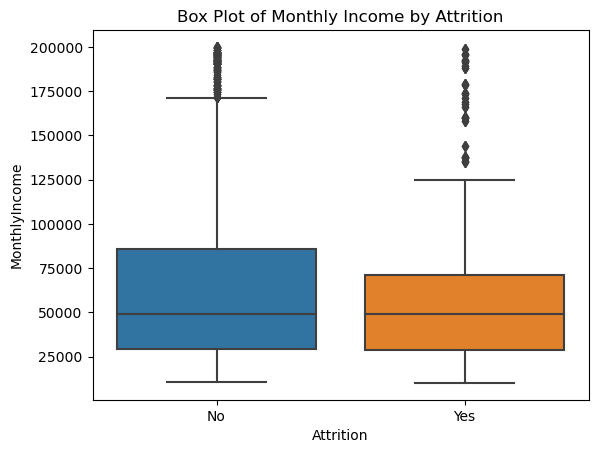

In [ ]:
# Générer un diagramme de boîte à moustaches pour 'MonthlyIncome' en fonction de 'Attrition'
sns.boxplot(x='Attrition', y='MonthlyIncome', data=general_data)
plt.title('Box Plot of Monthly Income by Attrition')
plt.show()

## Traitement des Données Manquantes

Dans cette étape, nous examinons les informations sur le DataFrame 'general_data' pour identifier et traiter les données manquantes.



In [ ]:
# Afficher les informations sur le DataFrame 'general_data'
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

**Vérification des Valeurs Manquantes:** Dans cette étape, nous examinons combien de valeurs manquent dans l'ensemble de données 'general_data'.

In [ ]:
# Vérifier le nombre de valeurs manquantes (NaN) dans le DataFrame 'general_data'
valeurs_NaN_missing_values_general_data = general_data[general_data.isnull().any(axis=1)]
len(valeurs_NaN_missing_values_general_data)

28

In [ ]:
# afficher les lignes contenant des valeurs manquantes (NaN) dans le DataFrame 'general_data'
valeurs_NaN_missing_values_general_data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,1,Manufacturing Director,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,1,Sales Executive,Divorced,23670,NaN,Y,12,8,1,5.0,2,5,0,4
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,1,Manufacturing Director,Married,37480,7.0,Y,14,8,2,NaN,3,3,1,2
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,1,Laboratory Technician,Divorced,99800,NaN,Y,11,8,1,18.0,2,10,6,9
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,1,Research Director,Single,27740,4.0,Y,13,8,1,NaN,2,5,1,3


In [ ]:
# Vérifiez les valeurs manquantes dans l'ensemble de données general_data
missing_values_general_data = general_data.isnull().sum()
missing_values_general_data

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
# Afficher les colonnes avec des valeurs manquantes
columns_with_missing_values = missing_values_general_data[missing_values_general_data > 0].index.tolist()
print(columns_with_missing_values)

['NumCompaniesWorked', 'TotalWorkingYears']


**Employés ayant travaillé pour une seule entreprise:**

Dans cette étape, nous identifions les employés ayant travaillé pour une seule entreprise ('NumCompaniesWorked' == 1) dans l'ensemble de données 'general_data'.



In [ ]:
# Afficher les lignes où « NumCompaniesWorked » est égal à 1
rows_equal_to_1_GD = valeurs_NaN_missing_values_general_data[valeurs_NaN_missing_values_general_data['NumCompaniesWorked'] == 1]
rows_equal_to_1_GD

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,1,Manufacturing Director,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,1,3819,Female,2,Laboratory Technician,Married,24130,1.0,Y,16,8,1,NaN,2,1,0,0


*N.B: Si un employé n'a travaillé que pour une seule entreprise , il est possible de remplacer la valeur manquante dans 'TotalWorkingYears' par la valeur de 'YearsAtCompany', en supposant que les années totales de travail sont équivalentes aux années passées dans l'entreprise actuelle.*

In [ ]:
# Créez une copie pour éviter de modifier le DataFrame d'origine
general_data_cleaned = general_data.copy()

# Imputer TotalWorkingYears pour les employés avec NumCompaniesWorked == 1
mask = (general_data_cleaned['NumCompaniesWorked'] == 1) & (general_data_cleaned['TotalWorkingYears'].isnull())
general_data_cleaned.loc[mask, 'TotalWorkingYears'] = general_data_cleaned.loc[mask, 'YearsAtCompany']

# Vérifier les modifications
print("Missing values in general_data_cleaned after imputation:")
print(general_data_cleaned.isnull().sum())


Missing values in general_data_cleaned after imputation:
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           7
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


puisque les valeurs manquantes sont limitées en nombre et qu’il n’y a pas de méthode d’imputation simple, nous décidons d’abandonner les employeurs qui ont une valeur manquante.

In [ ]:
# Supprimez les lignes avec des valeurs manquantes dans « NumCompaniesWorked » et « TotalWorkingYears ».
general_data_cleaned = general_data_cleaned.dropna(subset=['NumCompaniesWorked', 'TotalWorkingYears'])

# Vérifier les modifications
missing_values_after_cleaning = general_data_cleaned.isnull().sum()
print(missing_values_after_cleaning)


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


## Transformation des Variables Catégorielles


Dans cette étape, nous identifions les colonnes avec le type de données "objet", qui sont susceptibles de contenir des variables catégorielles. Ensuite, nous utiliserons l'encodage one-hot pour les variables nominales et l'encodage ordinal pour les variables ordinales.


* **Variables nominales :** les variables nominales représentent des catégories sans ordre ni classement inhérent entre elles. Les exemples incluent les couleurs, le sexe ou les types de fruits.
Par exemple, la variable « Genre » avec les valeurs « Homme » et « Femme » est une variable catégorielle nominale.

 * **Variables ordinales :** les variables ordinales représentent
des catégories avec un ordre ou un classement significatif. Toutefois, les intervalles entre les catégories peuvent ne pas être uniformes ou significatifs.
Les exemples incluent les niveaux d'éducation (par exemple, « lycée », « licence », « maîtrise »)

In [ ]:
#  renvoyer la liste des colonnes avec le type de données objet
categorical_columns = general_data_cleaned.select_dtypes(include=['object']).columns
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

## Exploration des Données Catégorielles

Dans cette étape, nous explorons les données catégorielles en affichant l'occurrence des valeurs dans la colonne 'BusinessTravel' et en visualisant la distribution des valeurs uniques pour chaque colonne catégorielle.

### Occurrence des valeurs dans la colonne 'BusinessTravel'


In [ ]:
# Afficher l'occurrence des valeurs dans la colonne 'BusinessTravel'
occurrence_Department = general_data['BusinessTravel'].value_counts()
print(occurrence_Department)

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64


array([<Axes: ylabel='freq'>], dtype=object)

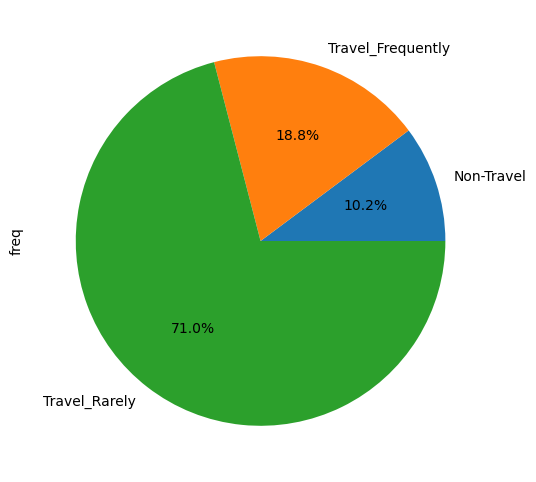

In [ ]:
# afficher des valeurs uniques pour 'BusinessTravel'
t = pd.crosstab(general_data.BusinessTravel, "freq")
t.plot.pie(subplots=True, figsize = (6, 6), autopct='%1.1f%%', legend=False)

In [ ]:
# afficher des valeurs uniques pour chacune des colonnes catégorielles
for column in categorical_columns:
    unique_values = general_data_cleaned[column].unique()
    print(f"{column}: {unique_values}")

Attrition: ['No' 'Yes']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
MaritalStatus: ['Married' 'Single' 'Divorced']
Over18: ['Y']


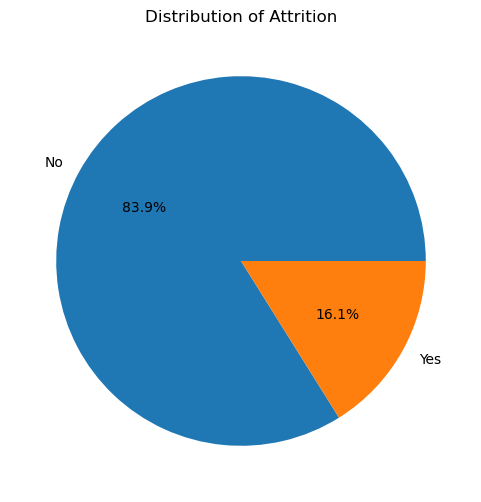

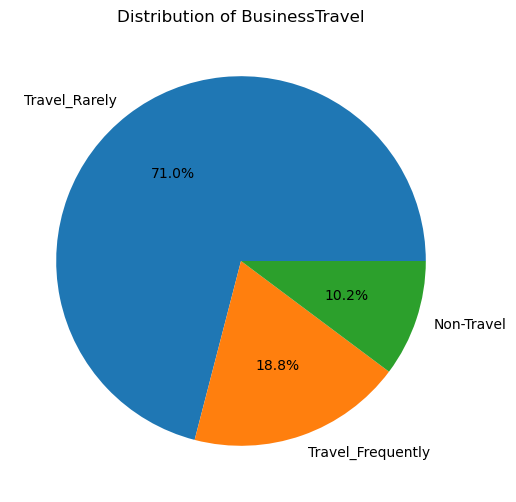

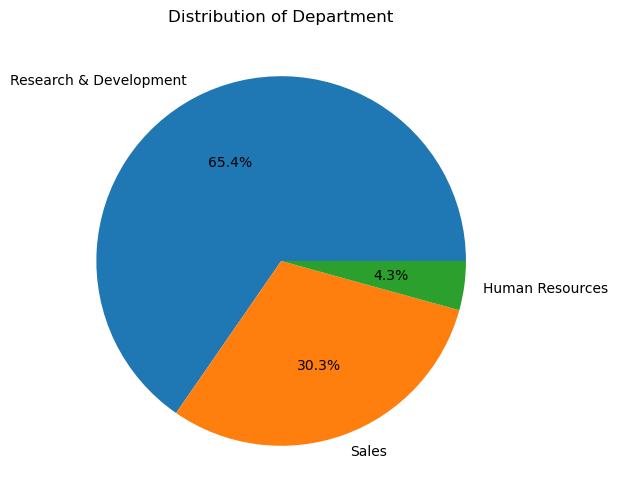

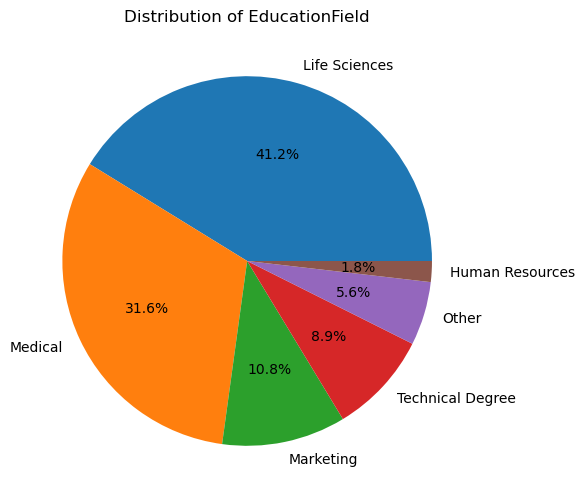

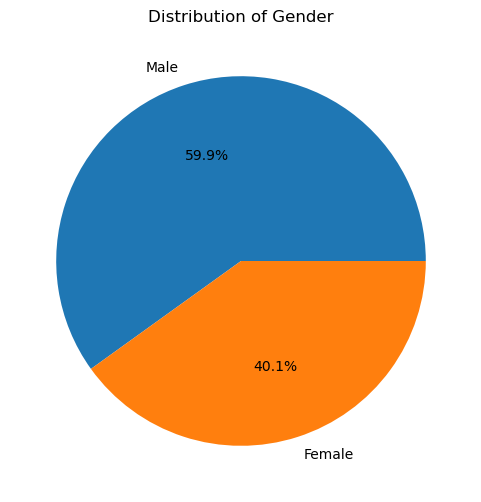

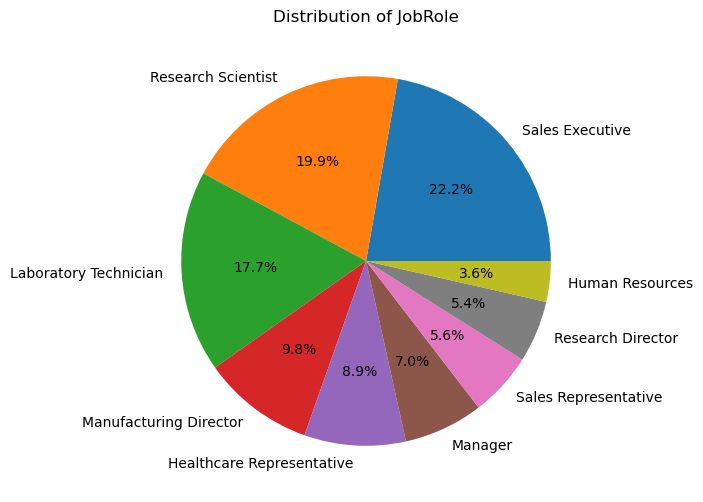

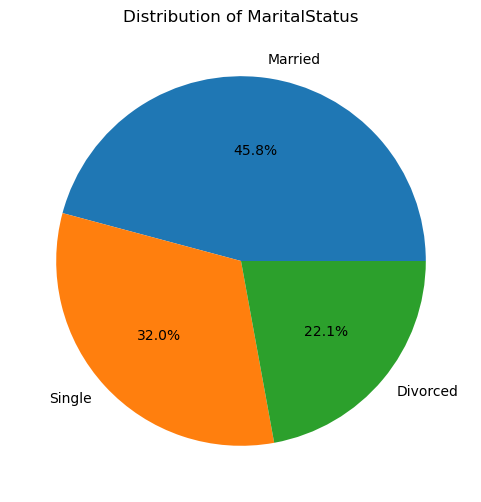

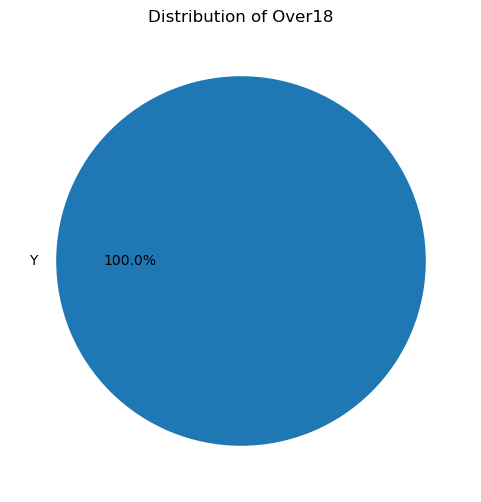

In [ ]:
# afficher la distribution des valeurs uniques pour chaque colonne
for column in categorical_columns:
    unique_values = general_data_cleaned[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(unique_values, labels=unique_values.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.show()

En procédant à l'analyse de nos données, nous constatons que toutes les variables catégorielles de notre ensemble de données sont en fait **nominales** ou **binaires**. Par conséquent, nous simplifions notre approche en utilisant **l'encodage one-hot** pour les **variables nominales** .

Lors de l'analyse des variables catégorielles, nous avons identifié que toutes nos variables sont de type nominale, c'est-à-dire qu'elles représentent des catégories sans ordre particulier. Par conséquent, nous avons décidé d'appliquer la technique de One-Hot Encoding pour transformer ces variables en représentations binaires.
Cependant, il est important de noter une exception pour la variable 'attrition'. Bien que cette variable soit également catégorielle, elle est de nature binaire, représentant probablement des catégories comme 'oui' et 'non'. Plutôt que d'utiliser One-Hot Encoding pour 'attrition', nous allons la considérer comme une variable ordinale et utiliser le Label Encoder, attribuant par exemple les valeurs 0 et 1 pour les catégories 'non' et 'oui' respectivement. Cette approche est justifiée par le fait
que 'attrition' a un ordre intrinsèque en tant que variable binaire, ce qui rend le One-Hot Encoding moins approprié dans ce cas particulier."

    variable nominale :['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']
    variable ordinale :['Attrition']

In [ ]:
# utiliser Label Encoding puisqu'il a un ordre
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Appliquer LabelEncoder à la variable binaire 'Attrition'
general_data_cleaned['Attrition'] = label_encoder.fit_transform(general_data_cleaned['Attrition'])

In [ ]:
# Afficher les 2 premières lignes pour vérification
general_data_cleaned['Attrition'].head(2)

0    0
1    1
Name: Attrition, dtype: int32

In [ ]:
general_data_cleaned.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4






**One-Hot Encoding** crée des colonnes binaires pour chaque catégorie d'une variable catégorielle et indique la présence de la catégorie avec un 1 ou un 0. Cette méthode est particulièrement adaptée aux variables catégorielles, où il n'y a pas d'ordre inhérent entre les catégories.

Par exemple, si nous avons une variable 'Couleur' avec des catégories 'Rouge', 'Vert' et 'Bleu', l'encodage one-hot créerait trois colonnes distinctes, une pour chaque couleur, indiquant la présence de chaque couleur avec 1 ou 0.

La fonction **`get_dummies`** dans la bibliothèque pandas est souvent utilisée pour effectuer l'encodage one-hot de manière pratique et efficace, quelle que soit le nombre de catégories dans la variable.



In [ ]:
    # utiliser One-Hot Encoding. Pandas fournit une fonction pratique get_dummies pour cela
nominal_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']
general_data_cleaned = pd.get_dummies(general_data_cleaned, columns=nominal_columns)

In [ ]:
general_data_cleaned.head(5)

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,0,6,2,1,1,1,131160,1.0,11,8,0,1.0,6,1,0,0,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True
1,31,1,10,1,1,2,1,41890,0.0,23,8,1,6.0,3,5,1,4,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
2,32,0,17,4,1,3,4,193280,1.0,15,8,3,5.0,2,5,0,3,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True
3,38,0,2,5,1,4,3,83210,3.0,11,8,3,13.0,5,8,7,5,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True
4,32,0,10,1,1,5,1,23420,4.0,12,8,2,9.0,2,6,0,4,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True


In [ ]:
# Convertir des booléens en entiers
general_data_cleaned = general_data_cleaned.astype(int)

In [ ]:
general_data_cleaned.head(5)

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,0,6,2,1,1,1,131160,1,11,8,0,1,6,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,31,1,10,1,1,2,1,41890,0,23,8,1,6,3,5,1,4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,32,0,17,4,1,3,4,193280,1,15,8,3,5,2,5,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,38,0,2,5,1,4,3,83210,3,11,8,3,13,5,8,7,5,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
4,32,0,10,1,1,5,1,23420,4,12,8,2,9,2,6,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1


# Création de Nouvelles Caractéristiques :

IN_OUT_TIME data


In [ ]:
in_time_data.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [ ]:
out_time_data.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

**objectif** :Construction de nouvelles variables pour mieux comprendre les données, comme la déviation des heures de travail par rapport aux attentes.


## Étape 1: Création d'un Nouvel Ensemble de Données pour les Heures de Travail


In [ ]:
# Convertir les colonnes de date au format datetime
in_time_data = in_time_data.apply(lambda col: pd.to_datetime(col, errors='coerce') if col.name != 'Unnamed: 0' else col)
out_time_data = out_time_data.apply(lambda col: pd.to_datetime(col, errors='coerce') if col.name != 'Unnamed: 0' else col)

# Calculer le décalage horaire en heures
work_hours_data = (out_time_data.iloc[:, 1:] - in_time_data.iloc[:, 1:]) / pd.Timedelta(hours=1)

# Ajouter la colonne 'EmployeeID'
work_hours_data['EmployeeID'] = in_time_data['Unnamed: 0']

# Remodeler les données dans le format souhaité
work_hours_data = work_hours_data.melt(id_vars=['EmployeeID'], var_name='Date', value_name='WorkHours')

# Faites pivoter les données pour obtenir le format souhaité
work_hours_pivot = work_hours_data.pivot(index='EmployeeID', columns='Date', values='WorkHours')

# Réinitialisez l'index pour avoir « EmployeeID » comme colonne
work_hours_pivot.reset_index(inplace=True)


In [ ]:
# afficher le resultat
work_hours_pivot

Date,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,NaN,7.346944,7.267500,NaN,6.775833,7.095000,7.050556,7.604722,NaN,7.629167,7.118889,7.413611,6.849722,6.901667,7.203056,7.605278,7.565278,7.470000,7.601389,7.267222,7.193056,7.435278,7.205278,7.605833,7.416111,7.839722,NaN,7.832222,7.441111,7.225000,7.583611,7.200833,7.385833,7.156944,6.759722,7.744444,NaN,7.815000,7.408611,6.923056,7.161111,7.080000,7.310278,NaN,6.915000,7.197778,7.847778,7.162500,7.616389,7.251944,7.445556,NaN,7.555833,7.356944,7.865000,7.336944,7.658611,7.187778,7.040833,7.640000,7.427222,7.803056,7.115833,7.348056,7.146667,7.459722,7.756944,7.284722,7.695278,6.975556,7.525000,7.336389,7.562500,7.241944,7.889167,7.691667,7.508056,NaN,7.410556,7.308611,7.456667,7.062778,7.615000,NaN,7.444722,7.502500,7.901667,6.816944,NaN,7.333056,7.319444,7.465278,7.128889,7.573056,7.199722,7.877778,7.447778,NaN,NaN,7.717222,7.514167,7.041944,NaN,7.072778,NaN,7.075278,7.575000,7.421389,7.595278,7.542222,7.526111,7.521389,7.248889,7.178333,6.912778,7.112778,7.753611,7.052222,7.661667,7.303056,7.723611,7.618333,7.158

In [ ]:
# Statistiques récapitulatives
summary_statistics = work_hours_pivot.describe()
summary_statistics.iloc[:, 1:]


Date,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
count,0.0,4201.000000,4204.000000,4182.000000,4201.000000,4167.000000,4195.000000,4171.000000,4145.000000,0.0,4174.000000,4146.000000,4182.000000,4169.000000,4170.000000,4170.000000,4161.000000,0.0,4193.000000,4198.000000,4134.000000,4202.000000,4202.000000,4204.000000,4198.000000,4199.000000,4199.000000,4186.000000,4191.000000,4184.000000,4174.000000,4198.000000,4188.000000,4166.000000,4181.000000,4193.000000,4198.000000,4169.000000,4184.000000,4176.000000,4172.000000,4174.000000,4156.000000,4182.000000,4179.000000,0.0,4168.000000,4178.000000,4167.000000,4178.000000,4191.000000,4219.000000,4191.000000,4179.000000,4173.000000,4171.000000,4187.000000,4203.000000,4193.000000,4207.000000,4192.000000,4175.000000,4188.000000,4199.000000,4192.000000,4207.000000,4176.000000,4176.000000,4186.000000,4171.000000,4178.000000,4192.000000,4197.000000,4203.000000,4182.000000,4196.000000,4187.000000,4175.000000,4170.000000,4213.000000,4188.000000,4190.000000,4159.000000,4195.000000,4172.000000,4197.000000,0.0,4206.000000,4191.000000,4177.000000,4187.000000,4179.000000,4181.000000,4181.000000,4197.000000,4198.000000,4203.0

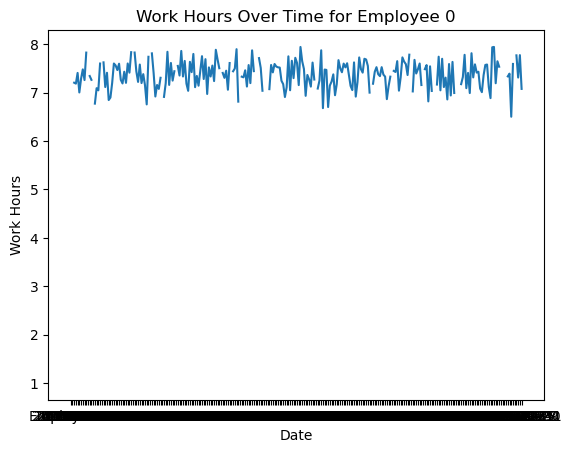

In [ ]:
# afficher un graphique des heures de travail d'un employé au fil du temps
import matplotlib.pyplot as plt

employee_id = 0
plt.plot(work_hours_pivot.columns, work_hours_pivot.iloc[employee_id])
plt.xlabel('Date')
plt.ylabel('Work Hours')
plt.title(f'Work Hours Over Time for Employee {employee_id}')
plt.show()

## Étape 2: Traitement des Données Manquantes


Les valeurs manquantes dans ces données représentent les jours où l'employé n'est pas arrivé à la société.


Au début, nous éliminerons les jours fériés en supprimant ceux où aucun employé n'est présent.

In [ ]:
# Identifier les colonnes de jours fériés
holidays = work_hours_pivot.columns[work_hours_pivot.isnull().all()].tolist()
holidays

['2015-01-01',
 '2015-01-14',
 '2015-01-26',
 '2015-03-05',
 '2015-05-01',
 '2015-07-17',
 '2015-09-17',
 '2015-10-02',
 '2015-11-09',
 '2015-11-10',
 '2015-11-11',
 '2015-12-25']

In [ ]:
# supprimer les colonnes de jours fériés
work_hours_pivot_cleaned = work_hours_pivot.drop(columns=holidays)

À l'étape suivante, nous substituerons les valeurs NaN restantes par 0, puisqu'elles signalent l'absence de l'employé ces jours-là.

In [ ]:
# Remplacer les valeurs NaN par 0 (Absence de l'employeur)
work_hours_pivot_cleaned = work_hours_pivot_cleaned.fillna(0)

In [ ]:
work_hours_pivot_cleaned

Date,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,7.346944,7.267500,0.000000,6.775833,7.095000,7.050556,7.604722,7.629167,7.118889,7.413611,6.849722,6.901667,7.203056,7.605278,7.565278,7.470000,7.601389,7.267222,7.193056,7.435278,7.205278,7.605833,7.416111,7.839722,0.000000,7.832222,7.441111,7.225000,7.583611,7.200833,7.385833,7.156944,6.759722,7.744444,7.815000,7.408611,6.923056,7.161111,7.080000,7.310278,0.000000,6.915000,7.197778,7.847778,7.162500,7.616389,7.251944,7.445556,0.000000,7.555833,7.356944,7.865000,7.336944,7.658611,7.187778,7.040833,7.640000,7.427222,7.803056,7.115833,7.348056,7.146667,7.459722,7.756944,7.284722,7.695278,6.975556,7.525000,7.336389,7.562500,7.241944,7.889167,7.691667,7.508056,7.410556,7.308611,7.456667,7.062778,7.615000,0.000000,7.444722,7.502500,7.901667,6.816944,0.000000,7.333056,7.319444,7.465278,7.128889,7.573056,7.199722,7.877778,7.447778,0.000000,0.000000,7.717222,7.514167,7.041944,0.000000,7.072778,0.000000,7.075278,7.575000,7.421389,7.595278,7.542222,7.526111,7.521389,7.248889,7.178333,6.912778,7.112778,7.753611,7.052222,7.661667,7.303056,7.723611,7.618333,7.158889,7.947500,7.651389,7.492500,6.936944,7.368611,7.276389,7.127778,7.624444,7.273889,7.087222,7.253889


Enfin, nous calculerons la différence entre les heures de travail effectives et les heures de travail prévues.

In [ ]:
# Afficher l'occurrence des valeurs dans la colonne 'StandardHours'
occurrence_standard_hours = general_data['StandardHours'].value_counts()
print(occurrence_standard_hours)

StandardHours
8    4410
Name: count, dtype: int64


In [ ]:
# Étant donné que la durée standard de travail est de 8 heures pour tous les employés,
expected_work_hours_per_day = 8

# Calculer le total des heures de travail pour chaque employé
total_work_hours_per_employee = work_hours_pivot_cleaned.iloc[:,1:].sum(axis=1)

# Calculer le nombre total de jours ouvrables
total_workdays = len(work_hours_pivot_cleaned.columns)

# Calculer le nombre total d'heures de travail prévu pour chaque employé
expected_total_work_hours_per_employee = expected_work_hours_per_day * total_workdays

# Calculer la difference entre les heures de travail réelles et les heures de travail prévues
deviation_from_expected_hours = total_work_hours_per_employee - expected_total_work_hours_per_employee

# Créez un nouveau DataFrame avec les identifiants des employés et leur difference par rapport aux heures prévues
deviation_df = pd.DataFrame({'EmployeeID': work_hours_pivot_cleaned.index, 'DeviationFromExpectedHours': deviation_from_expected_hours})

# Afficher le nouveau DataFrame
deviation_df


,EmployeeID,DeviationFromExpectedHours
0,0,-289.313056
1,1,-178.323333
2,2,-302.795833
3,3,-309.485556
4,4,-38.487222
...,...,...
4405,4405,70.913333
4406,4406,-531.598056
4407,4407,-219.768056
4408,4408,287.715278


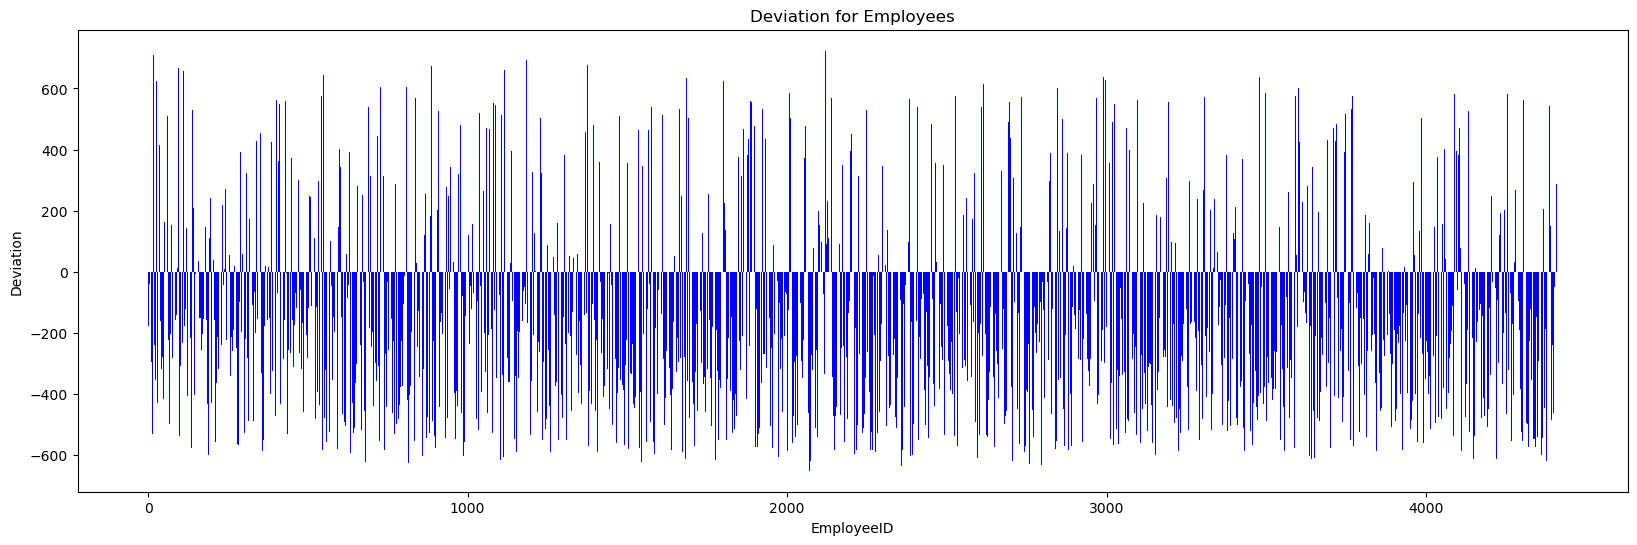

In [ ]:
# Afficher le nouveau DataFrame
employee_ids = deviation_df['EmployeeID']
deviations = deviation_df['DeviationFromExpectedHours']

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(employee_ids, deviations, color='blue')
plt.xlabel('EmployeeID')
plt.ylabel('Deviation')
plt.title('Deviation for Employees')
plt.show()

## Analyse Manager_survey_data & employee survey_data

## Traitement des Données Manquantes

In [ ]:
manager_survey_data

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [ ]:
# Vérifiez les valeurs manquantes dans l'ensemble de données manager_survey_data
missing_values_manager_survey_data = manager_survey_data.isnull().sum()
missing_values_manager_survey_data


EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [ ]:
employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [ ]:
# Vérifiez les valeurs manquantes dans l'ensemble de données employee_survey_data
missing_values_employee_survey_data = employee_survey_data.isnull().sum()
missing_values_employee_survey_data

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [ ]:
# Valeurs NaN
valeurs_NaN_employee_survey_data = employee_survey_data[employee_survey_data.isnull().any(axis=1)]
len(valeurs_NaN_employee_survey_data)

83

In [ ]:
valeurs_NaN_employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
11,12,NaN,4.0,3.0
40,41,3.0,NaN,3.0
84,85,3.0,4.0,NaN
111,112,NaN,2.0,3.0
124,125,3.0,NaN,3.0
...,...,...,...,...
4219,4220,2.0,NaN,3.0
4305,4306,2.0,2.0,NaN
4332,4333,NaN,4.0,3.0
4345,4346,4.0,NaN,4.0


Nous avons choisi de conserver les données, car elles pourraient être importantes. Nous envisageons de remplacer les valeurs NaN par la médiane ou la moyenne.

**Médiane :**

- La médiane est préférable lorsqu'on manipule des données asymétriques ou contenant des valeurs aberrantes. Cette mesure de tendance centrale est robuste, moins impactée par les valeurs extrêmes.
- C'est un choix judicieux pour l'imputation des valeurs manquantes, surtout lorsque l'on recherche la stabilité dans les estimations sans être influencé par quelques valeurs exceptionnellement élevées ou basses.

**Moyenne :**

- On opte pour la moyenne lorsque les données présentent une distribution relativement symétrique et ne comportent pas d'outliers significatifs.
- Cela représente un compromis pour l'imputation des valeurs manquantes dans des situations où la distribution est approximativement symétrique et ne comporte pas de valeurs extrêmes qui pourraient influencer de manière disproportionnée la moyenne.

test

In [ ]:
employee_survey_data.mean()

EmployeeID                 2205.500000
EnvironmentSatisfaction       2.723603
JobSatisfaction               2.728246
WorkLifeBalance               2.761436
dtype: float64

In [ ]:
employee_survey_data.median()

EmployeeID                 2205.5
EnvironmentSatisfaction       3.0
JobSatisfaction               3.0
WorkLifeBalance               3.0
dtype: float64

=> Nous conservons les données et choisissons de remplacer les valeurs manquantes par **`la médiane`**.

In [ ]:
# Calculer les médianes
medians_employee_survey_data = employee_survey_data[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].median()

# Imputer les valeurs manquantes avec medians_employee_survey_data
employee_survey_data_cleaned = employee_survey_data.fillna(medians_employee_survey_data)

employee_survey_data_cleaned


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


## Fusionner les ensembles de données

Maintenant, nous fusionnerons tous les ensembles de données en un seul ensemble de données pour faciliter le travail du modèle.

In [ ]:
# fusionner les ensembles de données
merged_data = pd.merge(general_data_cleaned, manager_survey_data, on='EmployeeID', how='inner')
merged_data = pd.merge(merged_data, employee_survey_data_cleaned, on='EmployeeID', how='inner')
merged_data = pd.merge(merged_data, deviation_df, on='EmployeeID', how='inner')
merged_data

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DeviationFromExpectedHours
0,51,0,6,2,1,1,1,131160,1,11,8,0,1,6,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,3,3,3.0,4.0,2.0,-178.323333
1,31,1,10,1,1,2,1,41890,0,23,8,1,6,3,5,1,4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2,4,3.0,2.0,4.0,-302.795833
2,32,0,17,4,1,3,4,193280,1,15,8,3,5,2,5,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,3,3,2.0,2.0,1.0,-309.485556
3,38,0,2,5,1,4,3,83210,3,11,8,3,13,5,8,7,5,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,2,3,4.0,4.0,3.0,-38.487222
4,32,0,10,1,1,5,1,23420,4,12,8,2,9,2,6,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,3,3,4.0,1.0,3.0,558.674722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,29,0,4,3,1,4405,2,35390,1,18,8,0,6,2,6,1,5,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,3,3.0,4.0,3.0,70.913333
4380,42,0,5,4,1,4406,1,60290,3,17,8,1,10,5,3,0,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,3,3,4.0,1.0,3.0,-531.598056
4381,29,0,2,4,1,4407,1,26790,2,15,8,0,10,2,3,0,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,2,3,4.0,4.0,3.0,-219.768056
4382,25,0,25,2,1,4408,2,37020,0,20,8,0,5,4,4,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,3,4,1.0,3.0,3.0,287.715278


In [ ]:
# Filtrer les salariés qui ont quitté l'entreprise (Attrition = '1')
departed_employees = general_data_cleaned[general_data_cleaned['Attrition'] == 1]
departed_employees

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
1,31,1,10,1,1,2,1,41890,0,23,8,1,6,3,5,1,4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
6,28,1,11,2,1,7,2,58130,2,20,8,1,5,2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
13,47,1,1,1,1,14,1,57620,1,11,8,2,10,4,10,9,9,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
28,44,1,1,2,1,29,2,103330,3,14,8,1,19,2,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
30,26,1,4,3,1,31,3,68540,2,11,8,0,5,5,3,0,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,1,7,1,1,4382,1,21800,1,21,8,0,4,2,4,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4386,33,1,11,4,1,4387,1,71400,5,21,8,0,8,2,5,0,4,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4388,33,1,1,3,1,4389,2,51470,7,11,8,0,13,2,9,1,7,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
4391,32,1,23,1,1,4392,3,24680,0,11,8,0,4,2,3,1,2,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1


# Modélisation et Prédiction





Nous avons opté pour l'utilisation de quatre modèles sur ces données afin d'observer les performances les plus optimales parmi eux. Les modèles choisis sont un arbre de décision(Decision Tree), une forêt aléatoire(Random Forest), une machine à vecteurs de support (SVM) et un réseau de neurones.

Notre variable cible dans ce problème est 'Attrition'.

In [ ]:
X = merged_data.drop(columns=['EmployeeID', 'Attrition'])
y = merged_data['Attrition']

Diviser les données entre l'ensemble d'entraînement et l'ensemble de test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normaliser les données

La normalisation est particulièrement importante pour les algorithmes qui s'appuient sur des mesures de distance ou des méthodes d'optimisation sensibles à l'échelle, telles que les SVM et les réseaux de neurones.
Les arbres de décision et une forêt aléatoire, qui prennent des décisions basées sur la répartition des fonctionnalités, ne sont généralement pas sensibles à l'échelle des fonctionnalités.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Les imports nécessaires pour utiliser un arbre de décision, une forêt aléatoire, une machine à vecteurs de support (SVM), et un réseau de neurones .

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shap

Nous avons commencé par le réseau de neurones.

nous avons créé un modèle de réseau neuronal à trois couches, en utilisant la fonction d'activation « relu » pour les couches cachées et « sigmoïde » pour la couche de sortie. Le modèle est compilé avec l'optimiseur 'adam' et la perte 'binary_crossentropy' pour un problème de classification binaire. Ensuite, il est formé sur les données de formation avec un ensemble de validation. Enfin, des prédictions sont faites sur l'ensemble de test en utilisant une règle de seuil de 0,5 pour la classification binaire.

In [ ]:
# Créer le modèle de réseau de neurones
RR_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
RR_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = RR_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Faire des prédictions sur l'ensemble de test
RR_predictions = (RR_model.predict(X_test) > 0.5).astype("int32")



Epoch 1/50


88/88 - 3s - loss: 0.6122 - accuracy: 0.7287 - val_loss: 0.4312 - val_accuracy: 0.8447 - 3s/epoch - 33ms/step
Epoch 2/50
88/88 - 0s - loss: 0.4997 - accuracy: 0.8128 - val_loss: 0.4115 - val_accuracy: 0.8447 - 366ms/epoch - 4ms/step
Epoch 3/50
88/88 - 0s - loss: 0.4686 - accuracy: 0.8264 - val_loss: 0.4008 - val_accuracy: 0.8447 - 308ms/epoch - 4ms/step
Epoch 4/50
88/88 - 0s - loss: 0.4465 - accuracy: 0.8342 - val_loss: 0.3925 - val_accuracy: 0.8447 - 302ms/epoch - 3ms/step
Epoch 5/50
88/88 - 0s - loss: 0.4322 - accuracy: 0.8317 - val_loss: 0.3826 - val_accuracy: 0.8447 - 307ms/epoch - 3ms/step
Epoch 6/50
88/88 - 0s - loss: 0.4199 - accuracy: 0.8378 - val_loss: 0.3762 - val_accuracy: 0.8447 - 307ms/epoch - 3ms/step
Epoch 7/50
88/88 - 0s - loss: 0.4150 - accuracy: 0.8342 - val_loss: 0.3701 - val_accuracy: 0.8447 - 304ms/epoch - 3ms/step
Epoch 8/50
88/88 - 0s - loss: 0.3886 - accuracy: 0.8385 - val_loss: 0.3606 - val_accuracy: 0.8447 - 312ms/epoch - 4ms/step
Epoch 9/50
88/

Arbre de décision

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

Forêt aléatoire

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

Machine à vecteurs de support (SVM)

In [ ]:
# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

Évaluer les modèles

In [ ]:
# Évaluer les modèles
def evaluate_model(model_name, predictions):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"----- {model_name} Model -----")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

In [ ]:
evaluate_model("Decision Tree", dt_predictions)

----- Decision Tree Model -----
Accuracy: 0.9966
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       744
           1       0.98      1.00      0.99       133

    accuracy                           1.00       877
   macro avg       0.99      1.00      0.99       877
weighted avg       1.00      1.00      1.00       877



In [ ]:
evaluate_model("Random Forest", rf_predictions)

----- Random Forest Model -----
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       744
           1       1.00      1.00      1.00       133

    accuracy                           1.00       877
   macro avg       1.00      1.00      1.00       877
weighted avg       1.00      1.00      1.00       877



In [ ]:
evaluate_model("SVM", svm_predictions)

----- SVM Model -----
Accuracy: 0.9293
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       744
           1       0.96      0.56      0.70       133

    accuracy                           0.93       877
   macro avg       0.94      0.78      0.83       877
weighted avg       0.93      0.93      0.92       877



In [ ]:
evaluate_model("Reseau de neurone", RR_predictions)

----- Reseau de neurone Model -----
Accuracy: 0.9133
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       744
           1       0.91      0.47      0.62       133

    accuracy                           0.91       877
   macro avg       0.91      0.73      0.79       877
weighted avg       0.91      0.91      0.90       877




## virtualisation

Afficher la matrice de confusion pour le modèle présentant la meilleure précision

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, class_labels=['Not Left', 'Left']):
    # Créer une matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Afficher la matrice de confusion à l'aide d'une carte thermique
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=class_labels, yticklabels=class_labels)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


** La matrice de confusion du modèle d'arbre de décision

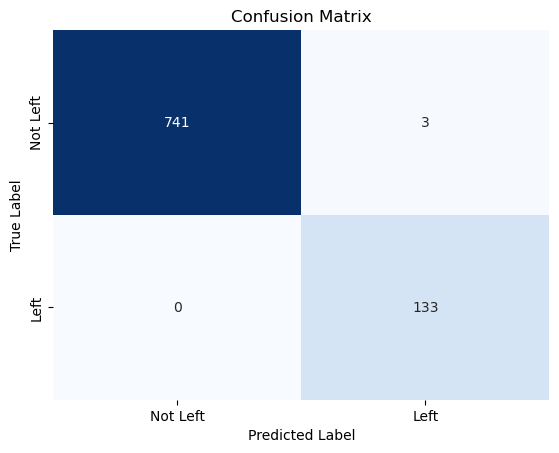

In [ ]:
plot_confusion_matrix(y_test, dt_predictions)

** La matrice de confusion du modèle de Forêt aléatoire

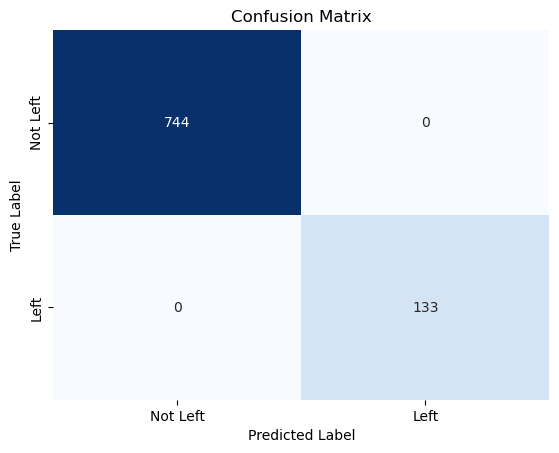

In [ ]:
plot_confusion_matrix(y_test, rf_predictions)


utilisation du  courbe ROC

La courbe ROC (Receiver Operating Characteristic) est un outil graphique utilisé en classification pour évaluer les performances d'un modèle. Elle représente la relation entre le taux de vrais positifs (sensibilité) et le taux de faux positifs (1 - spécificité) pour différents seuils de classification.

28/28 [==============================] - 0s 3ms/step


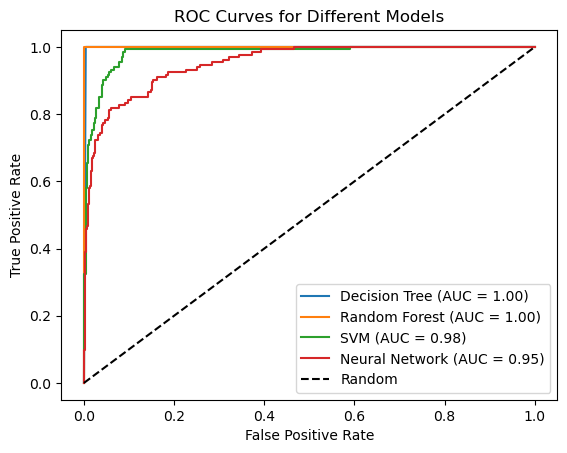

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Decision Tree
dt_scores = dt_model.predict_proba(X_test)[:, 1]

# Random Forest
rf_scores = rf_model.predict_proba(X_test)[:, 1]

# SVM
svm_scores = svm_model.decision_function(X_test)

# Neural Network
RR_scores = RR_model.predict(X_test)

# Fonction pour tracer la courbe ROC
def plot_roc_curve(model_name, y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Tracer des courbes ROC
plot_roc_curve("Decision Tree", y_test, dt_scores)
plot_roc_curve("Random Forest", y_test, rf_scores)
plot_roc_curve("SVM", y_test, svm_scores)
plot_roc_curve("Neural Network", y_test, RR_scores)

# Détails du traçage
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()


## Afficher les importances des caractéristiques (Feature importances) permet de comprendre les raisons pour lesquelles un employé a quitté l'entreprise.

In [ ]:
# fonction Affichage feature importances pour l’arbre de décision et la forêt aléatoire
def display_feature_importances(model_name, feature_importances, feature_names):
    print(f"----- {model_name} Feature Importances -----")
    for feature_name, importance in zip(feature_names, feature_importances):
        print(f"{feature_name}: {importance:.4f}")


In [ ]:
feature_names = X.columns.tolist()

In [ ]:
# Feature importances pour l’arbre de décision
dt_feature_importances = dt_model.feature_importances_
display_feature_importances("Decision Tree", dt_feature_importances, feature_names)

----- Decision Tree Feature Importances -----
Age: 0.0583
DistanceFromHome: 0.0346
Education: 0.0314
EmployeeCount: 0.0000
JobLevel: 0.0143
MonthlyIncome: 0.1013
NumCompaniesWorked: 0.0480
PercentSalaryHike: 0.0582
StandardHours: 0.0000
StockOptionLevel: 0.0325
TotalWorkingYears: 0.0860
TrainingTimesLastYear: 0.0399
YearsAtCompany: 0.0526
YearsSinceLastPromotion: 0.0299
YearsWithCurrManager: 0.0227
BusinessTravel_Non-Travel: 0.0000
BusinessTravel_Travel_Frequently: 0.0289
BusinessTravel_Travel_Rarely: 0.0077
Department_Human Resources: 0.0190
Department_Research & Development: 0.0018
Department_Sales: 0.0121
EducationField_Human Resources: 0.0019
EducationField_Life Sciences: 0.0040
EducationField_Marketing: 0.0079
EducationField_Medical: 0.0118
EducationField_Other: 0.0014
EducationField_Technical Degree: 0.0000
Gender_Female: 0.0000
Gender_Male: 0.0064
JobRole_Healthcare Representative: 0.0104
JobRole_Human Resources: 0.0035
JobRole_Laboratory Technician: 0.0049
JobRole_Manager: 0.00

In [ ]:
# Feature importances pour la forêt aléatoire
rf_feature_importances = rf_model.feature_importances_
display_feature_importances("Random Forest", rf_feature_importances, feature_names)

----- Random Forest Feature Importances -----
Age: 0.0769
DistanceFromHome: 0.0494
Education: 0.0289
EmployeeCount: 0.0000
JobLevel: 0.0275
MonthlyIncome: 0.0708
NumCompaniesWorked: 0.0389
PercentSalaryHike: 0.0437
StandardHours: 0.0000
StockOptionLevel: 0.0213
TotalWorkingYears: 0.0728
TrainingTimesLastYear: 0.0320
YearsAtCompany: 0.0573
YearsSinceLastPromotion: 0.0349
YearsWithCurrManager: 0.0423
BusinessTravel_Non-Travel: 0.0057
BusinessTravel_Travel_Frequently: 0.0167
BusinessTravel_Travel_Rarely: 0.0093
Department_Human Resources: 0.0089
Department_Research & Development: 0.0090
Department_Sales: 0.0087
EducationField_Human Resources: 0.0048
EducationField_Life Sciences: 0.0123
EducationField_Marketing: 0.0049
EducationField_Medical: 0.0109
EducationField_Other: 0.0039
EducationField_Technical Degree: 0.0047
Gender_Female: 0.0112
Gender_Male: 0.0103
JobRole_Healthcare Representative: 0.0055
JobRole_Human Resources: 0.0042
JobRole_Laboratory Technician: 0.0093
JobRole_Manager: 0.00

Les Machines à Vecteurs de Support (SVM) ne disposent pas d'une mesure directe de l'importance des caractéristiques comme les arbres de décision. Une méthode courante pour évaluer l'importance des caractéristiques dans les SVM consiste à examiner les coefficients des vecteurs de support, mais cela peut ne pas être aussi direct que dans le cas des arbres de décision ou des forêts aléatoires.

In [ ]:
# Feature importances pour SVM
from sklearn.linear_model import LogisticRegression

# Crée un modèle de régression logistique
logistic_model = LogisticRegression()

# Entraîne le modèle sur les données d'entraînement
logistic_model.fit(X_train, y_train)

# Obtient les coefficients pour chaque caractéristique
coefficients = logistic_model.coef_[0]

# Affiche les coefficients associés à chaque caractéristique en valeur absolue
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {abs(coef)}')

Age: 0.27136198683122803
DistanceFromHome: 0.017898540934692155
Education: 0.10542646930625367
EmployeeCount: 0.0
JobLevel: 0.0682263728398353
MonthlyIncome: 0.06078867077520081
NumCompaniesWorked: 0.3015774995054592
PercentSalaryHike: 0.05562657058638977
StandardHours: 0.0
StockOptionLevel: 0.06870904728994894
TotalWorkingYears: 0.6055889741089555
TrainingTimesLastYear: 0.18023350794552037
YearsAtCompany: 0.20108911627903922
YearsSinceLastPromotion: 0.516755450279412
YearsWithCurrManager: 0.6226987900283318
BusinessTravel_Non-Travel: 0.22122363597351202
BusinessTravel_Travel_Frequently: 0.2536711382968335
BusinessTravel_Travel_Rarely: 0.07336966779766783
Department_Human Resources: 0.12138140113918558
Department_Research & Development: 0.017443816151216603
Department_Sales: 0.03528702013831129
EducationField_Human Resources: 0.08169105007123302
EducationField_Life Sciences: 0.02210579937616648
EducationField_Marketing: 0.029288229469231687
EducationField_Medical: 0.029187540176244805


## Visualiser l'importance des caractéristiques

Nous allons trier les caractéristiques et les afficher horizontalement en utilisant le barplot de Seaborn, car il est souvent préféré pour son esthétique et sa simplicité

# Avec le modele random forest

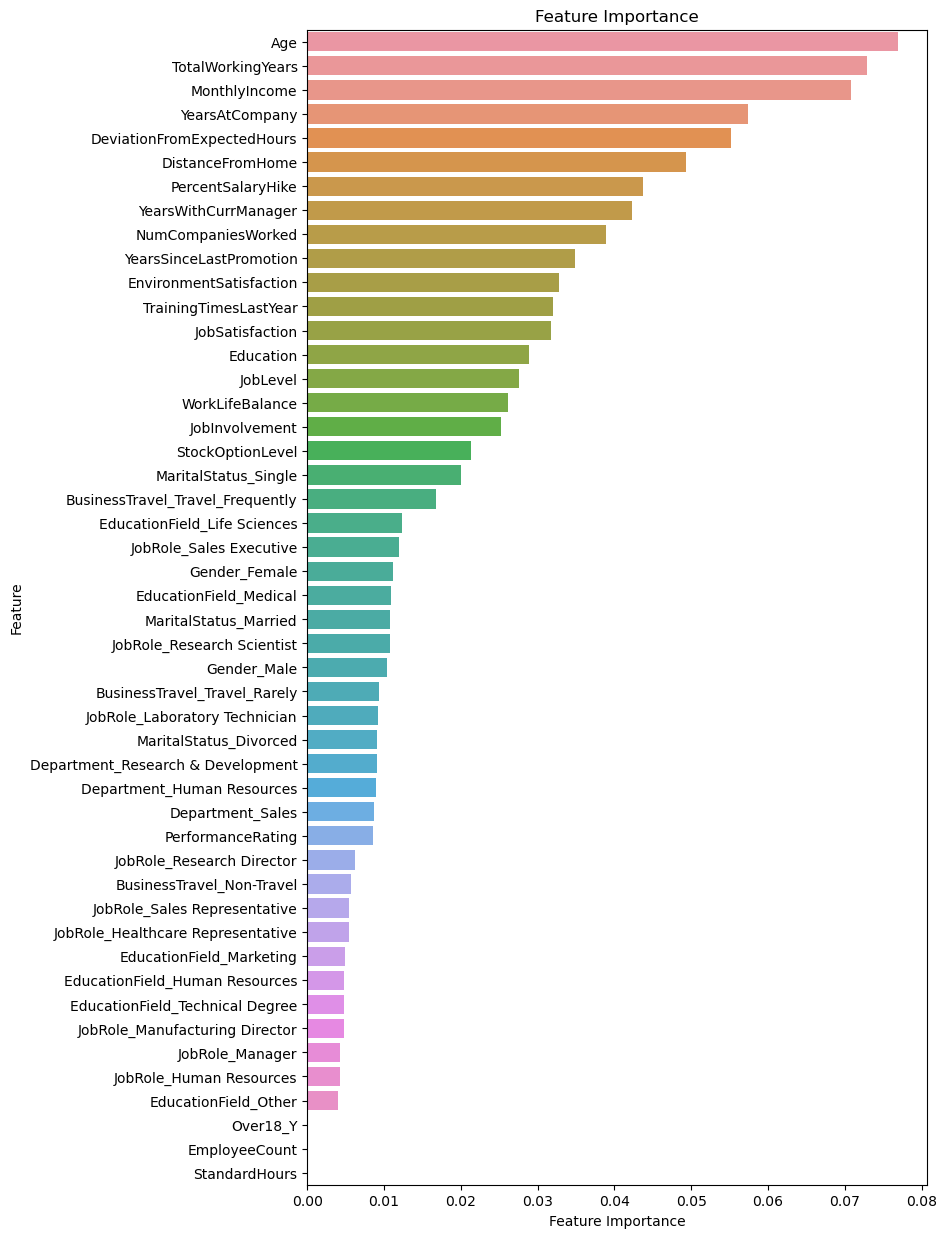

In [ ]:
# Créez un DataFrame pour un traçage plus facile
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances})
sorted_feature_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# tracage
plt.figure(figsize=(8, 15))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
# enregistrer le figuier
plt.savefig('feature_importance_plot2.png')
plt.show()

# Avec le modele tree decision

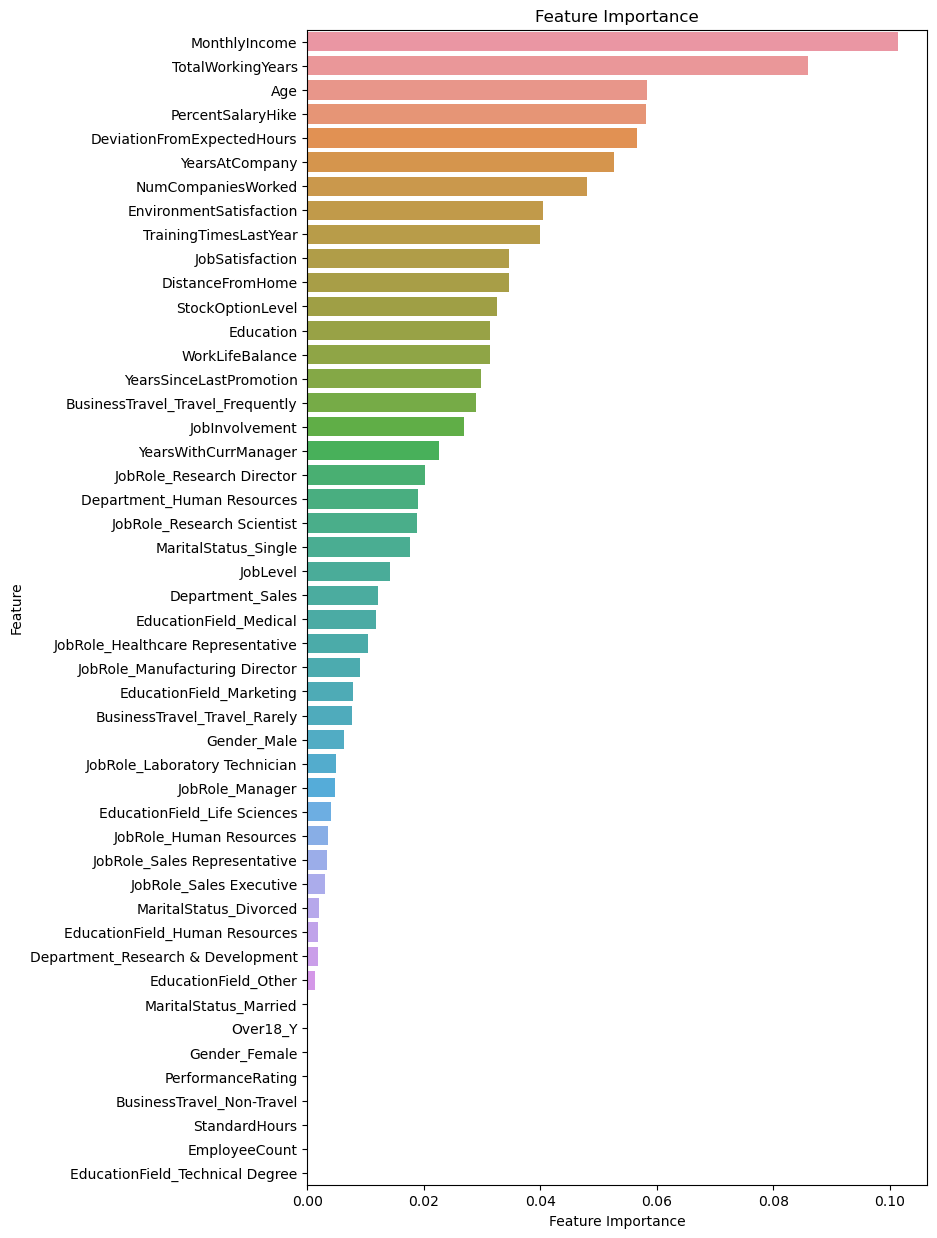

In [ ]:
# Créez un DataFrame pour un traçage plus facile
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_feature_importances})
sorted_feature_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tracage
plt.figure(figsize=(8, 15))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
# enregistrer le figuier
plt.savefig('feature_importance_plot2.png')
plt.show()